Hola soy María Isabel Rocha Vargas, tengo 16 años.

Los repositorios compartidos necesitan y deben tener un código de conducta ya que este permite una convivencia basada en el respeto entre las personas que usen el repositorio, ya que estos tipos de repositorios forma una pequeña comunidad.
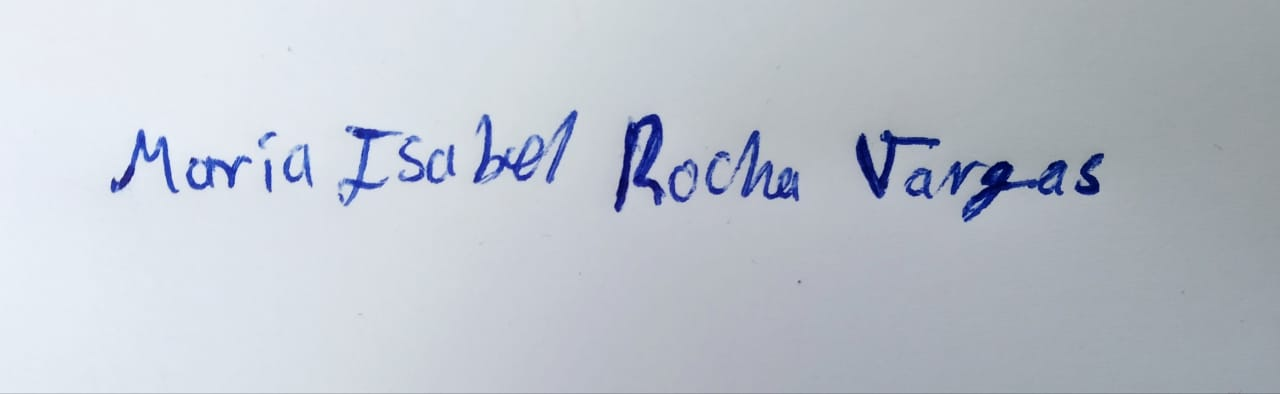

Erick Fernando Desjardines Ochoa, tengo 28
Porque realiz una gestión de organizar para establecer reglas específicas para perfilar comportamiento y practicas en una organizacion con base de principios, valores y creencias.


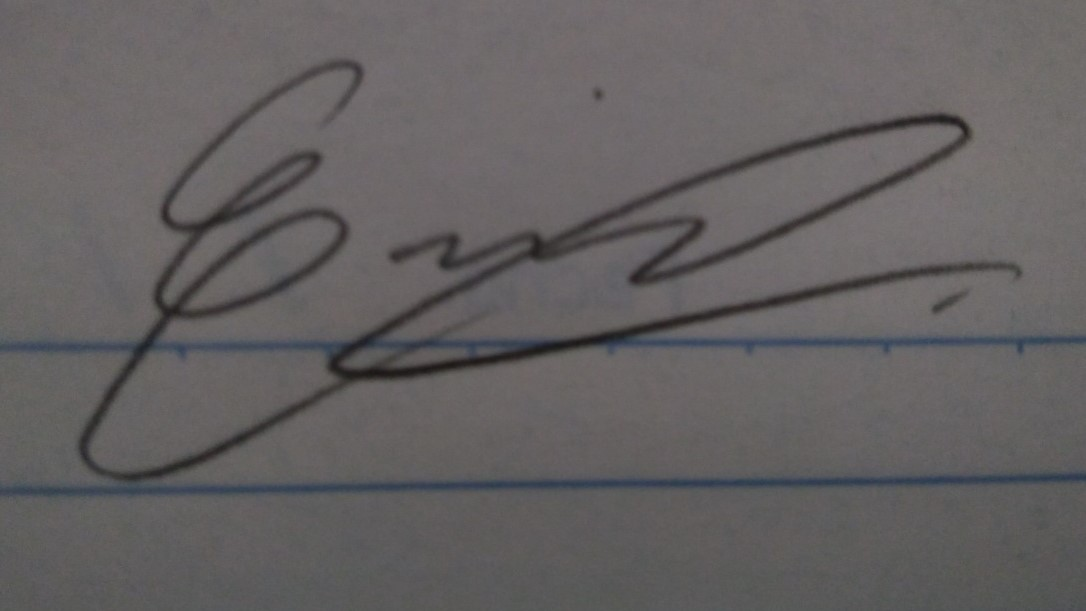

En este cuaderno exploramos los espectros del censo de galaxias rojas. Éstas mismas fueron minuciosamente analizadas bajo los criterios de líneas de emisión en el espectro. 

En las tablas se logran apreciar los datos de los análisis del desplazamiento al rojo (redshift) de las galaxias y sus espectros. Se logró saber el número de las identidades que le corresponde a los archivos que rellenan la tabla de espectros de las galaxias rojas, como también distribuir los gráficos en la sección de líneas de emisión, tipo espectral y asignación del valor de los elementos en la tabla de línea espectral.

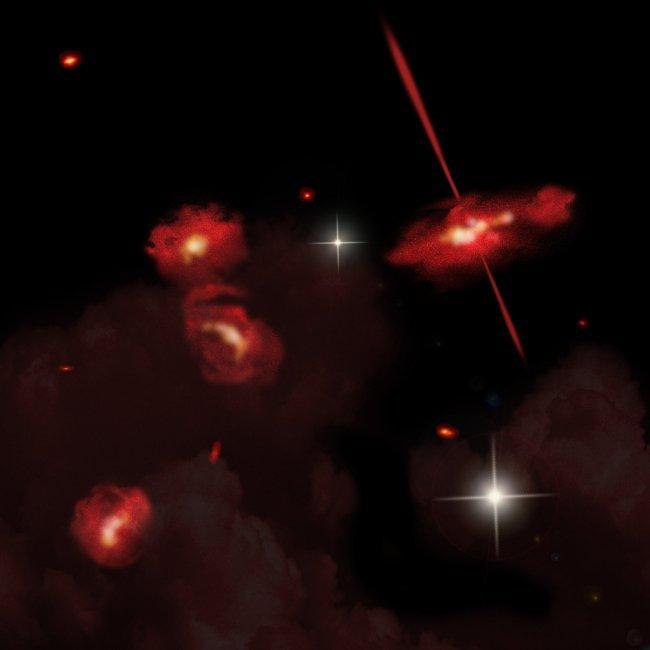

In [2]:
#Librerias 
import glob  
import pylab as pl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astropy.table import Table, join, vstack
from tools.legacy import cutout

In [3]:
def Rydberg(n, m):
    # Longitud de onda en el vacío del Hidrógeno [nanometros].
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

# Línea de Lyman-alfa del Hidrógeno.
Lya        = 10. * Rydberg(1, 2)

# La serie de Balmer del Hidrógeno.
Balmers    = 10. * np.array([Rydberg(2, m) for m in np.arange(6, 3, -1)])
Balmers

#Datos de las Galaxias de líneas de emisión
#los datos y las lineas de codigo fueron tomados del cuerno desihigh/Espanol/DESI_es.ipynb 
tracers  = ['elg'] 

In [4]:
# Aquí creamos tablas vacías que posteriormente rellenaremos con datos de los desplazamientos al rojo (redshift) de las galaxias, y sus espectros. 
redshifts   = Table()
spectra     = Table()

#DESI observa un "tile" de 5000 galaxias al mismo tiempo. Necesitamos saber el número de ID que le corresponde al tile correspondiente
#de los objetivos que queremos 
#Este es el link de los archivos que van a rellenar la tabla con los espectros de las galaxias rojas desihigh/desihigh/student_andes/zbest-elg-67230-20200315.fits
tiles     = {'elg': 67230 }

#Archivos de la carpeta students_andes en el repositorio de michaelJwilson/desihigh
rfiles      = glob.glob('../desihigh/student_andes/zbest-*')
sfiles      = glob.glob('../desihigh/student_andes/coadd-*')

for tracer in tracers:
  # Construimos el nombre del archivo para este trazador y tile.
    rfile     = '../desihigh/student_andes/zbest-{}-{}-20200315.fits'.format(tracer, tiles[tracer])    
  
  # Cargamos la información de los desplazamientos al rojo para este archivo y trazador.  
    redshifts = vstack((redshifts, Table.read(rfile)))

  # Lo mismo, pero para su espectro.
    sfile     = '../desihigh/student_andes/coadd-{}-{}-20200315.fits'.format(tracer, tiles[tracer]) 
    spectra   = vstack((spectra, Table.read(sfile)))
    
print('Número de {} galaxias disponibles: {:d}'.format(tracers[0], len(redshifts)))

Número de elg galaxias disponibles: 5


In [5]:
#Tabla de datos
redshifts

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,SPECTYPE,SUBTYPE,DELTACHI2,FLUX_G,FLUX_R,FLUX_Z,CMX_TARGET,TARGET_RA,TARGET_DEC
int64,float64,float64,float64,float64,int64,bytes6,bytes20,float64,float32,float32,float32,int64,float64,float64
35185735917113845,10764.65383195877,42.5780280333513 .. 0.7195145021931916,0.8332464310036912,1.4200433977250692e-05,0,GALAXY,,673.5024909973145,0.52179015,0.75193155,1.7199125,18014398509484032,138.73726415840585,-0.9066294864497983
35185735921307550,12761.211995601654,0.33759862860856854 .. 0.442773446601209,1.175260684617964,4.2542936795342e-05,0,GALAXY,,193.86768406629562,0.34077805,0.493405,1.1920415,2048,138.9518347877756,-0.9434723786932515
35185735921307794,14743.545125961304,26.97920394065816 .. 4.678683915319811,0.901264838465728,2.2340120371458945e-05,0,GALAXY,,413.93178523052484,0.34560418,0.32268295,0.80526763,2048,138.91422746123877,-0.9337888280552848
35185735921307907,16363.896586179733,27.149425054876943 .. 0.7946152965258367,0.7846085781003265,2.351437984419055e-05,0,GALAXY,,377.03603172302246,0.37620133,0.625006,1.5265825,2048,138.86933218065238,-0.9292718750580089
35185735921308923,11581.82614660263,28.047803567371894 .. 2.390792002071483,0.7594657393480638,1.2134858515734424e-05,0,GALAXY,,1094.169900894165,0.23944595,0.38585225,0.799893,2048,138.8156914266898,-0.8802451272362124


In [6]:
#Se agregan los elementos como variables asignando el valor que viene en la table of spectral lines
mgII=2799.117 
NV=1240.81 
oI=1305.53
cII=1335.31
siIV=1397.61
SiIV_OIV=1399.8
cIV=1549.48
OII= 3727.092
OII2=3729.875
SII=4072.3
H_=4102.89
H_Y=4341.68
OIII=4364.436
H_B=4862.68
OIII=4932.603


En esta gráfica se presenta líneas de emisión de lo elementos en 16 variables con distintos valores numéricos que representan
líneas de Hidrógeno en la cual se demuestra la amplitud, que es debido al constante rápido movimiento dentro de la galaxia que es tipo QUASAR (Quasi-Stellar Radio Source).


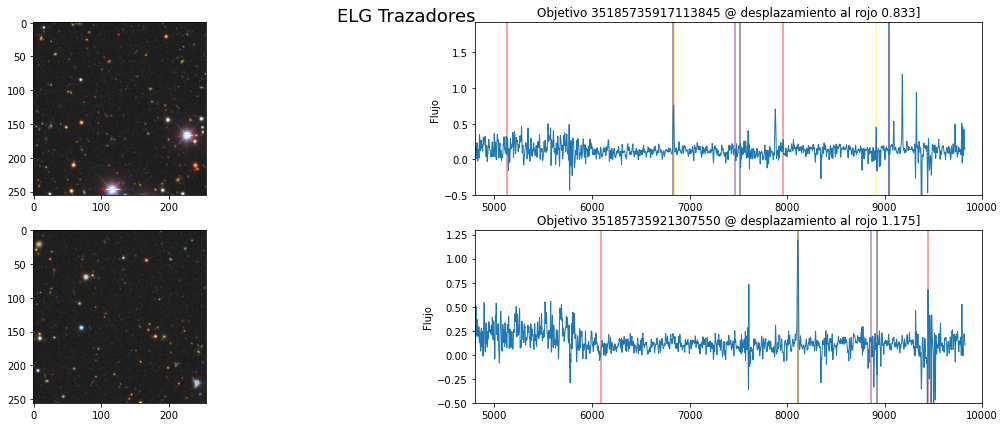

In [32]:
#ngal=numero de graficas
ngal = 2

# Hace la distribución de los gráficos.
fig, axes  = plt.subplots(ngal, 2, figsize=(20., 3.5 * ngal))

for i, tid in enumerate(redshifts['TARGETID'][:ngal]):
    redshift = redshifts['Z'][i]
    
#Poner la variable de cada elemento y poner un color, recuerda que debe estar en orden.
    axes[i,1].axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * NV, c='black', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * oI, c='orange', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * cII, c='purple', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * siIV, c='pink', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * SiIV_OIV , c='yellow', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * cIV , c='blue', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * mgII, c='red', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OII, c='black', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OII2, c='orange', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * SII, c='purple', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * H_, c='black', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * H_Y, c='red', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OIII, c='green', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * H_B, c='yellow', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OIII, c='blue', alpha=0.5)
  
    
  # ¡Finalmente, grafica el espectro de la galaxia!
    axes[i,1].plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
  
  # Añadimos un titulo
    axes[i,1].set_title('Objetivo {} @ desplazamiento al rojo {:.3f}]'.format(tid, redshift))

  # Definimos los límites de los ejes. 
    axes[i,1].set_xlim(4.8e3, 1.e4)
    axes[i,1].set_ylim(bottom=-0.5)

    axes[i,1].set_ylabel('Flujo')

  # Añadimos una foto de cada galaxia.
    url = cutout(axes[i,0], redshifts['TARGET_RA'][i], redshifts['TARGET_DEC'][i])

fig.suptitle('{} Trazadores'.format(tracers[0].upper()), fontsize=18, y=0.91)

print("En esta gráfica se presenta líneas de emisión de lo elementos en 16 variables con distintos valores numéricos que representan")
print("líneas de Hidrógeno en la cual se demuestra la amplitud, que es debido al constante rápido movimiento dentro de la galaxia que es tipo QUASAR (Quasi-Stellar Radio Source).")

Las galaxias con alto corrimiento al rojo contienen estrellas más jóvenes y en formación más activa por lo que emiten gran
cantidad de OII. Entonces, a medida que miramos más lejos, es más probable que veamos emisores de OII. Como estas galaxias están tan lejos, sería muy difícil detectar algo tan débil si no fuera por esta emisión de OII.


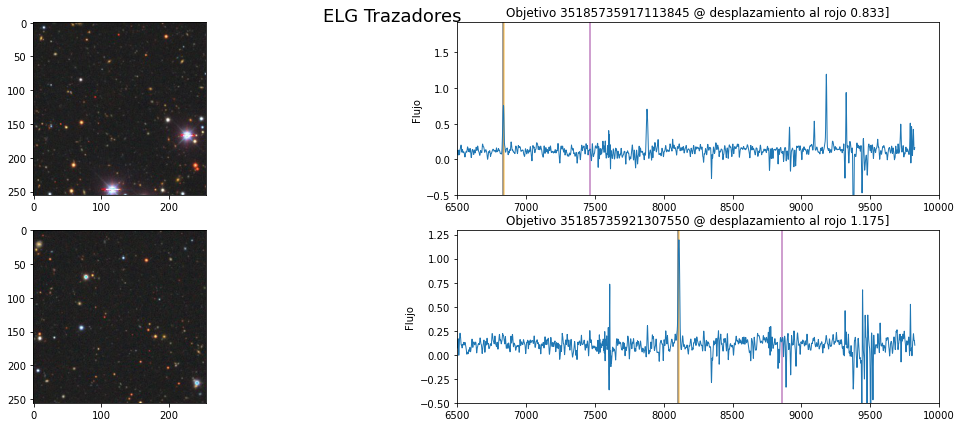

In [27]:
ngal = 2

fig, axes  = plt.subplots(ngal, 2, figsize=(19., 3.5 * ngal))

for i, tid in enumerate(redshifts['TARGETID'][:ngal]):
    redshift = redshifts['Z'][i]
    

    axes[i,1].axvline((1. + redshift) * OII, c='black', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OII2, c='orange', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * SII, c='purple', alpha=0.5)


    axes[i,1].plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
  

    axes[i,1].set_title('Objetivo {} @ desplazamiento al rojo {:.3f}]'.format(tid, redshift))

    axes[i,1].set_xlim(6.5e3, 1.e4)
    axes[i,1].set_ylim(bottom=-0.5)

    axes[i,1].set_ylabel('Flujo')


    url = cutout(axes[i,0], redshifts['TARGET_RA'][i], redshifts['TARGET_DEC'][i])

fig.suptitle('{} Trazadores'.format(tracers[0].upper()), fontsize=18, y=0.91)

print("Las galaxias con alto corrimiento al rojo contienen estrellas más jóvenes y en formación más activa por lo que emiten gran")
print("cantidad de OII. Entonces, a medida que miramos más lejos, es más probable que veamos emisores de OII. Como estas galaxias están tan lejos, sería muy difícil detectar algo tan débil si no fuera por esta emisión de OII.")

Text(0.5, 0.91, 'ELG Trazadores')

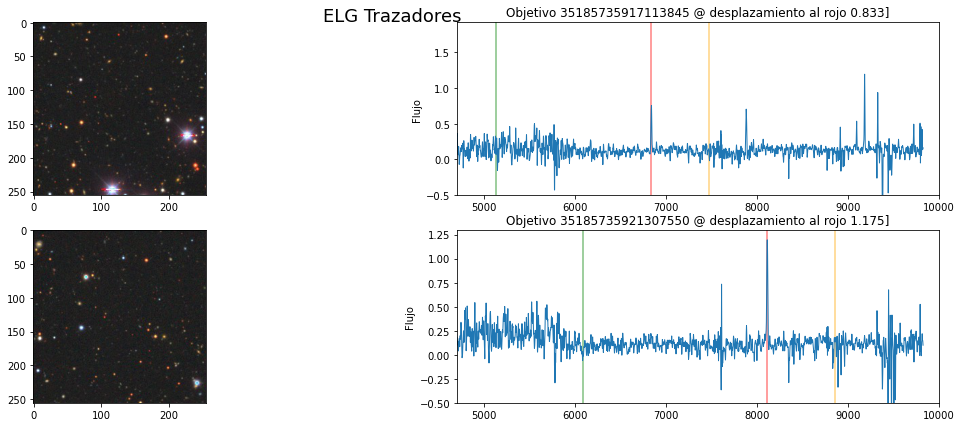

In [20]:
ngal = 2

fig, axes  = plt.subplots(ngal, 2, figsize=(19., 3.5 * ngal))

for i, tid in enumerate(redshifts['TARGETID'][:ngal]):
    redshift = redshifts['Z'][i]
    
    axes[i,1].axvline((1. + redshift) * mgII, c='green', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OII, c='red', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * SII, c='orange', alpha=0.5)
    
    
    axes[i,1].plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
  
    axes[i,1].set_title('Objetivo {} @ desplazamiento al rojo {:.3f}]'.format(tid, redshift))

    axes[i,1].set_xlim(4.7e3, 1e4)
    axes[i,1].set_ylim(bottom=-0.5)

    axes[i,1].set_ylabel('Flujo')

    url = cutout(axes[i,0], redshifts['TARGET_RA'][i], redshifts['TARGET_DEC'][i])

fig.suptitle('{} Trazadores'.format(tracers[0].upper()), fontsize=18, y=0.91)

Text(0.5, 0.91, 'ELG Trazadores')

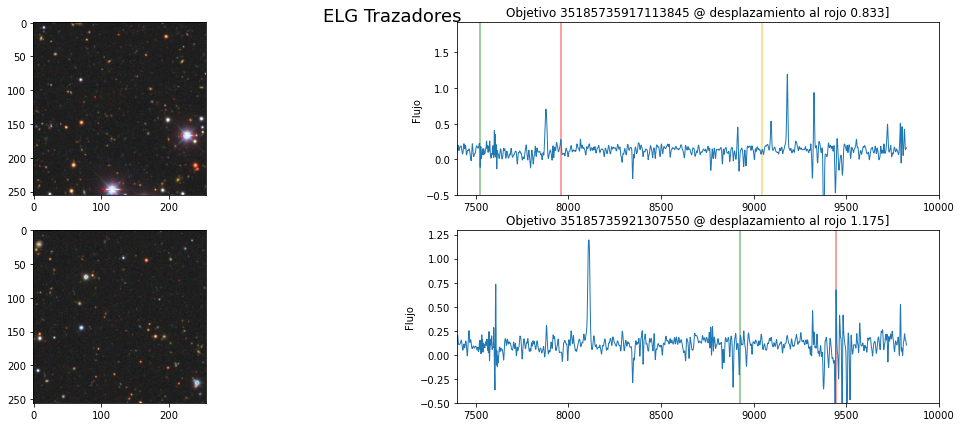

In [34]:
ngal = 2


fig, axes  = plt.subplots(ngal, 2, figsize=(19., 3.5 * ngal))

for i, tid in enumerate(redshifts['TARGETID'][:ngal]):
    redshift = redshifts['Z'][i]
    


    axes[i,1].axvline((1. + redshift) * H_, c='green', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * H_Y, c='red', alpha=0.5)
    axes[i,1].axvline((1. + redshift) * OIII, c='orange', alpha=0.5)
    
       

    axes[i,1].plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
  

    axes[i,1].set_title('Objetivo {} @ desplazamiento al rojo {:.3f}]'.format(tid, redshift))


    axes[i,1].set_xlim(7.4e3, 1e4)
    axes[i,1].set_ylim(bottom=-0.5)

    axes[i,1].set_ylabel('Flujo')


    url = cutout(axes[i,0], redshifts['TARGET_RA'][i], redshifts['TARGET_DEC'][i])

fig.suptitle('{} Trazadores'.format(tracers[0].upper()), fontsize=18, y=0.91)

Conclusiones

El espectrográfo es un instrumento de medición destinado al estudio de los espectros de los cuerpos físicos, o por medio de detectores fotosensibles.

Las líneas de hidrogeno que vemos son amplias. Esto es por que el mismo elemento se mueve demasiado rapido dentro de este tipo de galaxia llamada Cuasar. El nivel alto de luminosidad de la galaxia es porque la materia se acumula en su centro, y es ahi donde se presenta una mayor fuerza gravitatoria.

En las galaxias se observan cómo la linea de hidrogeno se amplia por el constante movimiento. Es decir, H = 4102.89 cambia a H Y = 4341.68 y ésta última a H B = 4862.68, por lo que se aprecia un cambio de transición de energía.

